In [1]:
import numpy as np
import cv2
from copy import deepcopy
import matplotlib.pyplot as plt
from PIL import Image
#import pytesseract as tess

In [30]:
def show(img):
    cv2.imshow("Input",img)
    cv2.waitKey(0); 
    cv2.destroyAllWindows()

In [31]:
img=cv2.imread('18.jpg')
show(img)

In [87]:
#for understanding the image pixel format of rgb image 
print(len(img))
print(len(img[0]))
print(len(img[0][0]))


277
500
3


In [5]:
#for color IMAGE


#blurring to remove high frequency component
imgBlurred = cv2.GaussianBlur(img, (5,5), 0)
show(imgBlurred)

#color to greyscale image
gray = cv2.cvtColor(imgBlurred, cv2.COLOR_BGR2GRAY)
show(gray)

#sobel edge detection 
sobelx = cv2.Sobel(gray,cv2.CV_8U,1,0,ksize=3)
show(sobelx)



In [18]:

# perform the canny edge detector to detect image edges
edges = cv2.Canny(gray, threshold1=30, threshold2=100)
show(sobelx)


In [93]:
#understanding the image pixel format
#here image is not in [r,g,b] rgb format , thats why dimension are 277*500
#if rgb color then dimension present the 277*500*3
#note  the dimensioin will remain 277*500 in whole remaing process

print(len(gray))
print(len(gray[0]))

277
500


277
500


In [19]:
#otsu thresolding
ret2,threshold_img = cv2.threshold(sobelx,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show(threshold_img)


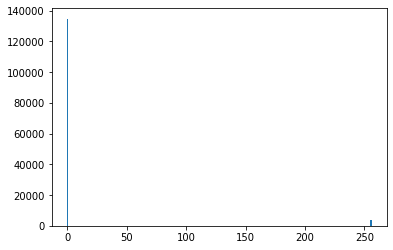

In [20]:
#biomodal image so better to use Otsu Thresolding
plt.hist(threshold_img.ravel(),256,[0,256]); plt.show()

In [9]:
morph_img_threshold = threshold_img.copy()

In [117]:
# rectangular kernel for morphological operation
element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(10, 5))

#morphological operation(dilation)
cv2.morphologyEx(src=threshold_img, op=cv2.MORPH_CLOSE, kernel=element, dst=morph_img_threshold)

show(morph_img_threshold)

In [90]:
for i in range(0,len(morph_img_threshold)):
    print(morph_img_threshold[i])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 255   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255 255
 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 255 255 255 255 255   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

In [92]:
#finding contours is like finding white object from black background.
#contours => (x,y) corrdinates of object

#Contour Approximation Method 
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html
# cv2.CHAIN_APPROX_NONE -all the boundary points are stored
#cv2.CHAIN_APPROX_SIMPLE -just two end points of that line , saving the memory

contours, hierarchy= cv2.findContours(morph_img_threshold,mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_NONE)

In [85]:
# for contour dimension


# n*m*1*2  
# n is number of object , m for no pair of x,y in paticular object , 1 is unncessary [[x,y]] instead of [x,y], 2 is (x,y)

print(len(contours))            #  n 
print(len(contours[0]))         #  m for first object

#extra [0] because in contours is (x,y) present in [[x,y]] instead of only [x,y]
print(len(contours[0][0][0]))   # x,y


26
7
2


In [112]:
#print(contours)



In [110]:
#Understanding the coordinates of contour

#Dimesion of morph_img_threshold is 277*500
# contours[0][0][0] => [465,275]  
# row is y coordinates and column in x coordinate

print(contours[0][0][0])
print(morph_img_threshold[274][464])

[464 274]
255


In [111]:
#drawing contours on original colored image
cv2.drawContours(img, contours, -1, (255,255,255), 1)

array([[[ 41,  52,  50],
        [ 41,  52,  50],
        [ 40,  51,  49],
        ...,
        [ 27,  32,  31],
        [ 27,  32,  31],
        [ 27,  32,  31]],

       [[ 37,  48,  46],
        [ 37,  48,  46],
        [ 37,  48,  46],
        ...,
        [ 28,  33,  32],
        [ 27,  32,  31],
        [ 26,  31,  30]],

       [[ 34,  45,  43],
        [ 33,  44,  42],
        [ 33,  44,  42],
        ...,
        [ 28,  33,  32],
        [ 27,  32,  31],
        [ 26,  31,  30]],

       ...,

       [[130, 135, 136],
        [130, 135, 136],
        [129, 134, 135],
        ...,
        [117, 118, 122],
        [118, 119, 123],
        [121, 122, 126]],

       [[130, 135, 136],
        [130, 135, 136],
        [129, 134, 135],
        ...,
        [119, 120, 124],
        [118, 119, 123],
        [118, 119, 123]],

       [[127, 132, 133],
        [127, 132, 133],
        [127, 132, 133],
        ...,
        [115, 118, 122],
        [113, 116, 120],
        [113, 116, 120]]

In [53]:
show(img)